# Inference of Gaussian parameters continued 

Take a look at the code below and the output. 

1. What is different from the previous case? Is this a full Bayesian treatment of the problem? 
2. Examine the influence of the prior parameters and the number of data points. 

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -21.422: 100%|██████████| 200000/200000 [00:13<00:00, 15066.65it/s]
Finished [100%]: Average ELBO = -21.397
100%|██████████| 1000/1000 [00:01<00:00, 720.63it/s]



m:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.142            0.425            0.019            [0.162, 1.881]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.193          0.880          1.160          1.422          1.963


sigma:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.533            0.299            0.013            [1.031, 2.142]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  1.062          1.337          1.491          1.697          2.203



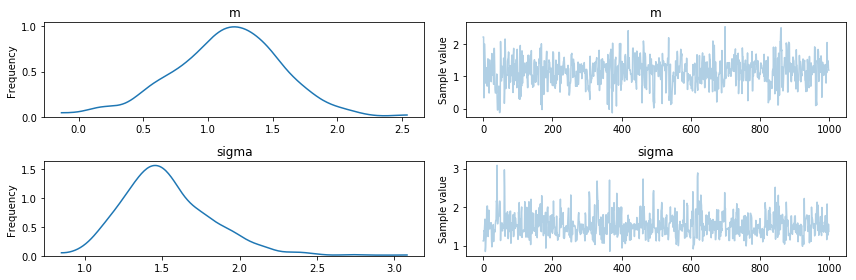

In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

# Generate some Gaussian data
m=1 # mean
s=2 # standard deviation
n=10 # number of data points
data=np.random.normal(m, s, n)

# Create pyMC3 model object
gauss_model = pm.Model()

with gauss_model:
    # Priors
    mu = pm.Normal('m', mu=0, sd=1)
    sigma = pm.HalfNormal('sigma', sd=1)

    # Likelihood
    obs = pm.Normal('obs', mu=mu, sd=sigma, observed=data)

    trace = pm.sample(1000)
    
    pm.summary(trace)
    pm.traceplot(trace)
    plt.show()

